In [49]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
citydata=pd.DataFrame(pd.read_csv(city_data_to_load))
#citydata

ridedata=pd.DataFrame(pd.read_csv(ride_data_to_load))
#ridedata
# Combine the data into a single dataset
merge_table = pd.merge(ridedata,citydata , on="city")
#merge_table.to_csv("merge_table.csv", index=False, header=True)
# Display the data table for preview
merge_table.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

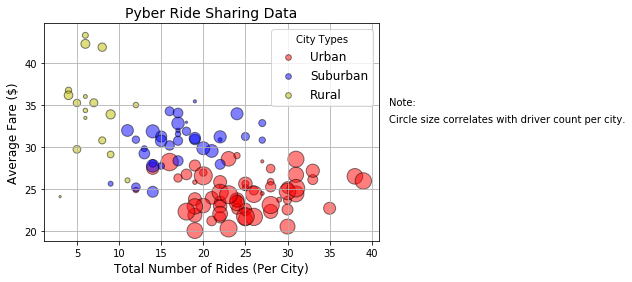

In [423]:
# Obtain the x and y coordinates for each of the three city types
data = pd.read_csv("merge_table.csv")
data.sort_values("type", inplace = True)
data = data.reindex()
# Build the scatter plots for each city types
data1=data.iloc[0:125,:]
grouped_df=data1.groupby('city')
for city in grouped_df['city']:
        fare1=grouped_df['fare'].sum()/grouped_df['fare'].count()
        ride1=grouped_df['ride_id'].count()
       
data2=data.iloc[126:750,:]
grouped_df=data2.groupby('city')
for city in grouped_df['city']:
        fare2=grouped_df['fare'].sum()/grouped_df['fare'].count()
        ride2=grouped_df['ride_id'].count()
        
data3=data.iloc[751:,:]       
grouped_df=data3.groupby('city')
for city in grouped_df['city']:
        fare3=grouped_df['fare'].sum()/grouped_df['fare'].count()
        ride3=grouped_df['ride_id'].count()       
     
plt.scatter(ride3, fare3, marker="o", facecolors="r", label="Urban",edgecolors="black",s=x_axis, alpha=0.5)
plt.scatter(ride2, fare2, marker="o", facecolors="b", label="Suburban",edgecolors="black",s=x_axis, alpha=0.5)
plt.scatter(ride1, fare1, marker="o", facecolors="y", label="Rural",edgecolors="black",s=x_axis, alpha=0.5)


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data",fontsize=14)
plt.xlabel("Total Number of Rides (Per City)",fontsize=12)
plt.ylabel("Average Fare ($)",fontsize=12)
plt.grid()
# Create a legend
plt.legend(markerscale=0.2,loc="best",title="City Types",fontsize=12,)
# Incorporate a text label regarding circle size
plt.text(42,35,"Note:")
plt.text(42,33,"Circle size correlates with driver count per city.")
# Save Figure
plt.savefig("PyberRide.png")

In [354]:
# Show plot
plt.show()

## Total Fares by City Type

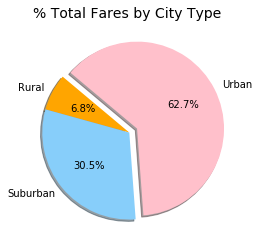

In [413]:
# Calculate Type Percents

grouped_type=data.groupby('type')
for type in grouped_df['type']:
        faretype=grouped_type['fare'].sum()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
sizes = faretype
colors = ["orange", "lightskyblue","pink"]
explode = (0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% Total Fares by City Type ",fontsize=14)
# Save Figure
plt.savefig("TotalFares.png")
plt.show()

In [407]:
# Show Figure
plt.show()

## Total Rides by City Type

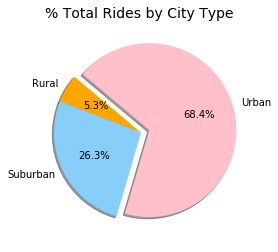

In [414]:
# Calculate Ride Percents

grouped_type=data.groupby('type')
for type in grouped_df['type']:
        ridetype=grouped_type['ride_id'].count()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
sizes = ridetype
colors = ["orange", "lightskyblue","pink"]
explode = (0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% Total Rides by City Type ",fontsize=14)
# Save Figure
plt.savefig("TotalRides.png")
plt.show()

In [422]:
# Show Figure
plt.show()

## Total Drivers by City Type

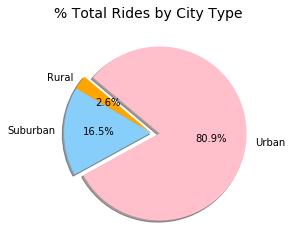

In [420]:
# Calculate Driver Percents

dataunique=data.drop_duplicates(subset ="city",keep = 'first', inplace = True) 
data.to_csv("cityunique.csv", index=False, header=True)
dataunique = pd.read_csv("cityunique.csv")

grouped_type=dataunique.groupby('type')
for type in grouped_df['type']:
        drivertype=grouped_type['driver_count'].sum()

# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
sizes = drivertype
colors = ["orange", "lightskyblue","pink"]
explode = (0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% Total Rides by City Type ",fontsize=14)
# Save Figure
plt.savefig("TotalDrivers.png")
plt.show()

In [421]:
# Show Figure
plt.show()